Evictions, NTA maps & Zip Code map obtained from https://opendata.cityofnewyork.us/data/

Median Household Income per Zip Code obtained from https://data.cccnewyork.org/data/table/66/median-incomes#66/107/25/a/a

In [ ]:
pip install geopandas

In [2]:
# importing packages
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns 
%matplotlib inline 

import matplotlib.pyplot as plt
from datetime import datetime
from geopandas import GeoDataFrame

In [3]:
# mounting google drive to upload files
from google.colab import drive

drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


## Data Description

In [4]:
# reading evictions data with pandas
evictions = pd.read_csv('/content/MyDrive/MyDrive/Colab Notebooks/Data/Evictions.csv')

Things to notice:


*   Executed Date
*   Marshal First Name + Marshal Last Name
*   Residential/Commcerical
*   Borough
*   Eviction Postcode
*   NTA





In [5]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40492/17,337309,2130 TIEBOUT AVENUE,103/1ST FL,04/23/2018,Thomas,Bia,Residential,BRONX,10457,Not an Ejectment,Possession,40.853575,-73.898475,5.0,15.0,379.0,2013305.0,2.031430e+09,Mount Hope
1,K091444/17,388532,769 ST MARKS AVENUE,3-5E,03/12/2018,Richard,McCoy,Residential,BROOKLYN,11213,Not an Ejectment,Possession,40.675029,-73.946598,8.0,36.0,313.0,3030734.0,3.012210e+09,Crown Heights North
2,064158/18,86100,191-19 JAMAICA AVE,SECOND FLOOR LEFT,08/29/2018,Henry,Daley,Commercial,QUEENS,11423,Not an Ejectment,Possession,40.712604,-73.768501,12.0,23.0,482.0,4000000.0,4.104470e+09,Hollis
3,83867/16-2,6895,546 ISHAM STREET,22A,06/27/2017,George,"Essock, Jr.",Residential,MANHATTAN,10034,Not an Ejectment,Possession,40.866936,-73.919009,12.0,10.0,293.0,1064851.0,1.022270e+09,Marble Hill-Inwood
4,085641/18,91267,381 ESSEX STREET,2,09/04/2019,Henry,Daley,Residential,BROOKLYN,11208,Not an Ejectment,Possession,40.674648,-73.881858,5.0,37.0,1166.0,3088972.0,3.040040e+09,East New York


In [6]:
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

## Trends

In [7]:
# adding new column "Date" with executed dates converted to datetime
evictions['Date'] = pd.to_datetime(evictions['Executed Date'], format="%m/%d/%Y")

In [8]:
evictions.dtypes['Executed Date']

dtype('O')

In [9]:
evictions.dtypes['Date']

dtype('<M8[ns]')

In [10]:
evictions.sort_values('Date', ascending=True)

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Date
41732,N070028/16,371877,315 EAST 102ND ST,729,01/03/2017,Richard,McCoy,Residential,MANHATTAN,10029,Not an Ejectment,Possession,40.787834,-73.943766,11.0,8.0,164.0,1088305.0,1.016740e+09,East Harlem South,2017-01-03
3855,77609/16,58316,310 EAST 44TH STREET,723,01/03/2017,Justin,Grossman,Residential,MANHATTAN,10017,Not an Ejectment,Possession,40.750894,-73.970758,6.0,4.0,88.0,1038671.0,1.013360e+09,Turtle Bay-East Midtown,2017-01-03
25835,55509/16,462258,1880 LAFAYETTE AVENU E,22D,01/03/2017,Danny,Weinheim,Residential,BRONX,10473,Not an Ejectment,Possession,40.821892,-73.859109,9.0,18.0,16.0,2092711.0,2.036000e+09,Soundview-Castle Hill-Clason Point-Harding Park,2017-01-03
43426,73745/16,7297,214-55 JAMAICA AVENUE,2F,01/03/2017,Edward,Guida,Residential,QUEENS,11428,Not an Ejectment,Possession,40.716818,-73.741983,13.0,23.0,542.0,4226220.0,4.106050e+09,Queens Village,2017-01-03
58536,90762/16,59352,2155 STRAUSS STREET,2F,01/03/2017,Howard,Schain,Residential,BROOKLYN,11212,Not an Ejectment,Possession,40.661121,-73.914361,16.0,42.0,898.0,3082079.0,3.035840e+09,Brownsville,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,65405/19,12421,442A EAST 14TH STREET - THE STREET LEVEL STORE...,NaN,02/04/2021,Robert,Renzulli,Commercial,MANHATTAN,10009,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-04
6146,79035/19,106064,2253 STRAUSS STRE ET A/K/A 47 NEWPORT STREET,STOREFRONT,02/09/2021,Justin,Grossman,Commercial,BROOKLYN,11212,Not an Ejectment,Possession,40.658878,-73.913787,16.0,42.0,896.0,3082249.0,3.035970e+09,Brownsville,2021-02-09
65893,63780/19,208836,118-05 LIBERTY AVENUE FIRST FLOOR STORE BASEME...,NaN,03/02/2021,Richard,Capuano,Commercial,QUEENS,11419,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-02
43010,64106/19,13012,435 W 31ST STREET,23 Q,05/03/2021,Robert,Renzulli,Residential,MANHATTAN,10001,Not an Ejectment,Possession,40.751916,-73.998686,4.0,3.0,103.0,1089664.0,1.007298e+09,Hudson Yards-Chelsea-Flatiron-Union Square,2021-05-03


In [11]:
# checking largest value in data set
evictions['Date'].max()

Timestamp('2070-03-29 00:00:00')

2070?? 

Assumption: this is a typo and can be removed

In [12]:
# removing row with outlier
evictions = evictions.drop([6867])

In [13]:
## making seperate series for each year
# str.contains returns true if string contains substring
# true values are indexed in data frame to isolate rows
evictions2017 = evictions[evictions['Executed Date'].str.contains('2017')]
evictions2018 = evictions[evictions['Executed Date'].str.contains('2018')]
evictions2019 = evictions[evictions['Executed Date'].str.contains('2019')]
evictions2020 = evictions[evictions['Executed Date'].str.contains('2020')]
evictions2021 = evictions[evictions['Executed Date'].str.contains('2021')]

In [14]:
evictions2017.groupby(['Date']).count().head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,102,102,102,88,102,102,102,102,102,102,102,102,99,99,99,99,99,99,99,99
2017-01-04,144,144,144,129,144,144,144,144,144,144,144,144,128,128,128,128,128,128,128,128
2017-01-05,127,127,127,107,127,127,127,127,127,127,127,127,111,111,111,111,111,111,111,111
2017-01-06,150,150,150,130,150,150,150,150,150,150,150,150,138,138,138,138,138,138,138,138
2017-01-09,105,105,105,94,105,105,105,105,105,105,105,105,93,93,93,93,93,93,93,93


In [15]:
# find total amount of evictions in 2017
# court index number gives total, some rows do not have apartment number, latitude/longitude etc
evictions2017.groupby(['Date']).count().sum()

Court Index Number           22530
Docket Number                22530
Eviction Address             22530
Eviction Apartment Number    19027
Executed Date                22530
Marshal First Name           22530
Marshal Last Name            22530
Residential/Commercial       22530
BOROUGH                      22530
Eviction Postcode            22530
Ejectment                    22530
Eviction/Legal Possession    22530
Latitude                     20385
Longitude                    20385
Community Board              20385
Council District             20385
Census Tract                 20385
BIN                          20355
BBL                          20355
NTA                          20385
dtype: int64

In [16]:
print("# of evictions in 2017: ", evictions2017.groupby(['Date']).count().sum()[1])
print("# of evictions in 2018: ", evictions2018.groupby(['Date']).count().sum()[1])
print("# of evictions in 2019: ", evictions2019.groupby(['Date']).count().sum()[1])
print("# of evictions in 2020: ", evictions2020.groupby(['Date']).count().sum()[1])
print("# of evictions in 2021: ", evictions2021.groupby(['Date']).count().sum()[1])

# of evictions in 2017:  22530
# of evictions in 2018:  21830
# of evictions in 2019:  18647
# of evictions in 2020:  3387
# of evictions in 2021:  8


2017 had the largest number and 2021 had the smallest number


*   The main reason in the large difference in evictions in years 2020 and 2021 compared to others, may be in that evictions have been prohibited to protect residents during the pandemic



In [17]:
# want to visualize # of evictions per day and compare each year on same plot
# need to have the x axis plot m/d
# code below creates a column in each dataset that has the same year
evictions2017['new_date'] = pd.to_datetime(evictions2017['Executed Date'].str.replace('/2017', ''), format="%m/%d")
evictions2018['new_date'] = pd.to_datetime(evictions2018['Executed Date'].str.replace('/2018', ''), format="%m/%d")
evictions2019['new_date'] = pd.to_datetime(evictions2019['Executed Date'].str.replace('/2019', ''), format="%m/%d")
evictions2020['new_date'] = pd.to_datetime(evictions2020['Executed Date'].str.replace('/2020', ''), format="%m/%d")
evictions2021['new_date'] = pd.to_datetime(evictions2021['Executed Date'].str.replace('/2021', ''), format="%m/%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [18]:
evictions2020.groupby(['new_date']).count().head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Date
new_date,,,,,,,,,,,,,,,,,,,,,
1900-01-02,65,65,65,51,65,65,65,65,65,65,65,65,59,59,59,59,59,58,58,59,65
1900-01-03,80,80,80,73,80,80,80,80,80,80,80,80,74,74,74,74,74,74,74,74,80
1900-01-06,128,128,128,103,128,128,128,128,128,128,128,128,113,113,113,113,113,113,113,113,128
1900-01-07,129,129,129,109,129,129,129,129,129,129,129,129,123,123,123,123,123,121,121,123,129
1900-01-08,114,114,114,102,114,114,114,114,114,114,114,114,96,96,96,96,96,96,96,96,114


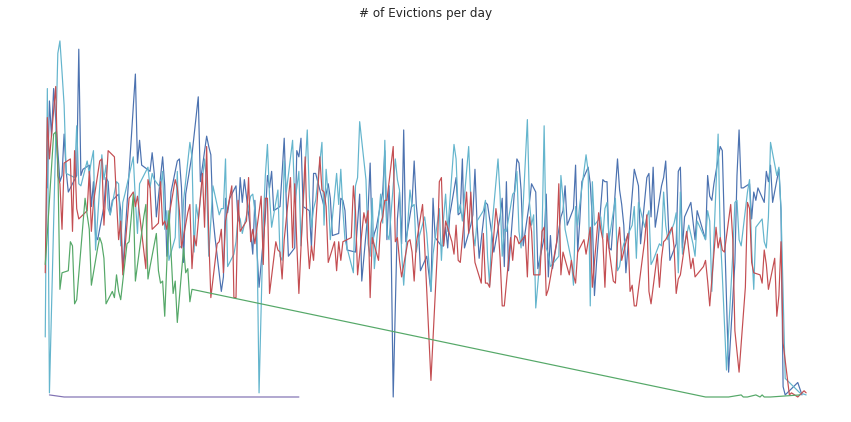

In [19]:
sns.set(rc={'figure.figsize':(15, 8)})

evictions2017.groupby(['new_date']).count()['Court Index Number'].plot(linewidth=1.2, c='b');
evictions2018.groupby(['new_date']).count()['Court Index Number'].plot(linewidth=1.2, c='c');
evictions2019.groupby(['new_date']).count()['Court Index Number'].plot(linewidth=1.2, c='r');
evictions2020.groupby(['new_date']).count()['Court Index Number'].plot(linewidth=1.2, c='g');
evictions2021.groupby(['new_date']).count()['Court Index Number'].plot(linewidth=1.2, c='m');

plt.title('# of Evictions per day')

plt.axis('off')

plt.show()

blue = 2017, cyan = 2018, red = 2019, green = 2020, magenta = 2021

Things to notice:

*   trends are hard to differentiate for years 2017-2019
*   evictions decline linearly in 2020 to a very small amount which has stayed constant until present day



## Commercial/Residential Evictions

In [20]:
# grouping by eviction type
evictions.groupby(['Residential/Commercial']).count()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Date
Residential/Commercial,,,,,,,,,,,,,,,,,,,,
Commercial,5593,5593,5593,2720,5593,5593,5593,5593,5593,5593,5593,3746,3746,3746,3746,3746,3691,3691,3746,5593
Residential,60809,60809,60809,52699,60809,60809,60809,60809,60809,60809,60809,56342,56342,56342,56342,56342,56280,56280,56342,60809


In [21]:
# indexing docket number
evictions.groupby(['Residential/Commercial']).count().loc['Residential'][1]

60809

In [22]:
evictions.groupby(['Residential/Commercial']).count().loc['Commercial'][1]

5593

In [23]:
# ratio
x = evictions.groupby(['Residential/Commercial']).count().loc['Residential'][1]
y = evictions.groupby(['Residential/Commercial']).count().loc['Commercial'][1]

x/y

10.872340425531915

In [24]:
print('residential-to-commercial ratio')
print("all years: ", round(evictions.groupby(['Residential/Commercial']).count().loc['Residential'][1]/evictions.groupby(['Residential/Commercial']).count().loc['Commercial'][1], 2))
print("2017: ", round(evictions2017.groupby(['Residential/Commercial']).count().loc['Residential'][1]/evictions2017.groupby(['Residential/Commercial']).count().loc['Commercial'][1], 2))
print("2018: ", round(evictions2018.groupby(['Residential/Commercial']).count().loc['Residential'][1]/evictions2018.groupby(['Residential/Commercial']).count().loc['Commercial'][1], 2))
print("2019: ", round(evictions2019.groupby(['Residential/Commercial']).count().loc['Residential'][1]/evictions2019.groupby(['Residential/Commercial']).count().loc['Commercial'][1], 2))
print("2020: ", round(evictions2020.groupby(['Residential/Commercial']).count().loc['Residential'][1]/evictions2020.groupby(['Residential/Commercial']).count().loc['Commercial'][1], 2))
print("2021: ", round(evictions2021.groupby(['Residential/Commercial']).count().loc['Residential'][1]/evictions2021.groupby(['Residential/Commercial']).count().loc['Commercial'][1], 2))

residential-to-commercial ratio
all years:  10.87
2017:  12.1
2018:  10.85
2019:  10.15
2020:  8.62
2021:  0.14


ratio decreased in 2020 probably as a result of decreased evictions of residents (protection during the pandemic)

## Top 5 Eviction Marshalls

In [25]:
# merging first name and last name columns into one clumn using string addition
evictions['Marshall Full Name'] = evictions['Marshal First Name'] + ' ' + evictions['Marshal Last Name']


In [26]:
evictions.groupby(['Marshall Full Name']).count().shape

(28, 21)

In [27]:
len(evictions['Marshall Full Name'].unique())

28

In [28]:
# to get top 5 eviction marshals for past five years
evictions.groupby(['Marshall Full Name']).count().sort_values('Court Index Number', ascending=False).head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Date
Marshall Full Name,,,,,,,,,,,,,,,,,,,,,
Justin Grossman,9173,9173,9173,9172,9173,9173,9173,9173,9173,9173,9173,9173,8807,8807,8807,8807,8807,8787,8787,8807,9173
Henry Daley,6487,6487,6487,5686,6487,6487,6487,6487,6487,6487,6487,6487,5796,5796,5796,5796,5796,5779,5779,5796,6487
Ileana Rivera,5842,5842,5842,4913,5842,5842,5842,5842,5842,5842,5842,5842,5630,5630,5630,5630,5630,5619,5619,5630,5842
Thomas Bia,5560,5560,5560,5456,5560,5560,5560,5560,5560,5560,5560,5560,5512,5512,5512,5512,5512,5502,5502,5512,5560
Edward Guida,5422,5422,5422,2459,5422,5422,5422,5422,5422,5422,5422,5422,5328,5328,5328,5328,5328,5315,5315,5328,5422


## 5 Boroughs

In [29]:
# number of evictions in each borough for 2017
evictions2017.groupby(['BOROUGH']).count()['Court Index Number']

BOROUGH
BRONX            7662
BROOKLYN         6357
MANHATTAN        3452
QUEENS           4325
STATEN ISLAND     734
Name: Court Index Number, dtype: int64

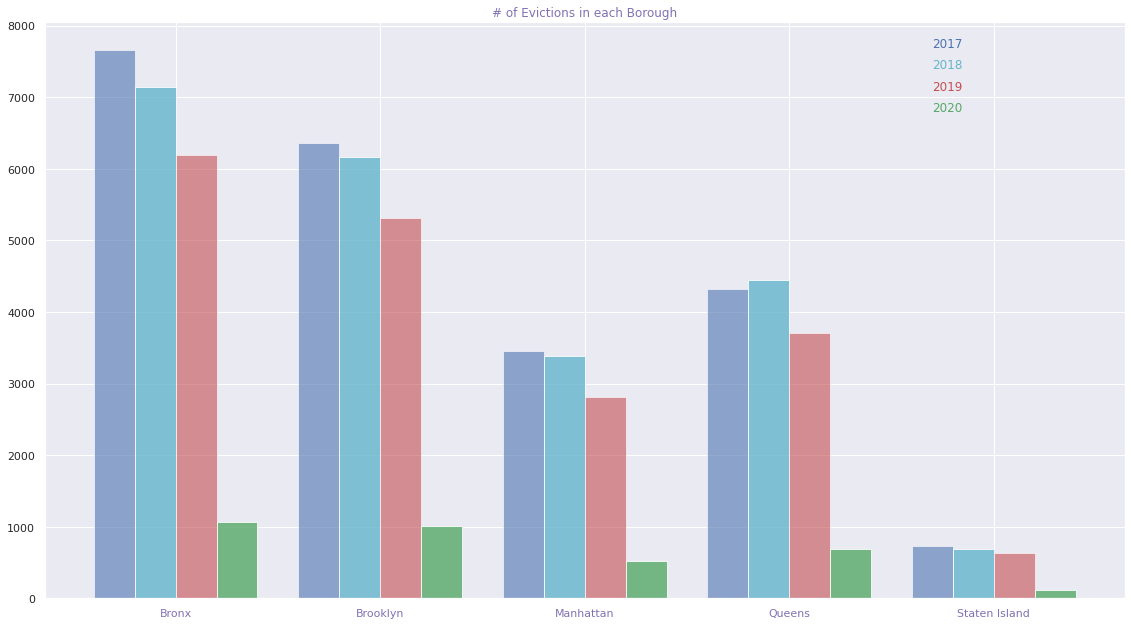

In [30]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

X = np.arange(len(boroughs))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, evictions2017.groupby(['BOROUGH']).count()['Court Index Number'], color = 'b', width = 0.20, alpha = 0.6)
ax.bar(X + 0.20, evictions2018.groupby(['BOROUGH']).count()['Court Index Number'], color = 'c', width = 0.20, alpha = 0.8)
ax.bar(X + 0.40, evictions2019.groupby(['BOROUGH']).count()['Court Index Number'], color = 'r', width = 0.20, alpha = 0.6)
ax.bar(X + 0.60, evictions2020.groupby(['BOROUGH']).count()['Court Index Number'], color = 'g', width = 0.20, alpha = 0.8)

plt.text(4.0,7700, '2017', c= 'b')
plt.text(4.0,7400, '2018', c = 'c')
plt.text(4.0,7100, '2019', c= 'r')
plt.text(4.0,6800, '2020', c = 'g')

ax.set_xticks(X + 0.3)
ax.set_xticklabels(boroughs, c='m')

ax.set_title('# of Evictions in each Borough', c= 'm')


plt.show()

Census Bureau
1. Brooklyn = 2,589,974 (2019)
2. Queens = 2,287,388 (2019)
3. Manhattan = 1,631,993 (2019)
4. Bronx = 1,435,068 (2019)
5. Staten Island = 474,893 (2019)

The bronx has the fourth largest population but has the largest number of evictions.



## Chloropleth Map

In [31]:
# upload NTA file
nta = gpd.read_file('/content/MyDrive/MyDrive/Colab Notebooks/Data/NTA map')

In [32]:
nta

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."
...,...,...,...,...,...,...,...,...
190,2.0,Bronx,005,BX63,West Concourse,1.936954e+07,28550.700370,"POLYGON ((-73.91192 40.84326, -73.91194 40.843..."
191,4.0,Queens,081,QN17,Forest Hills,5.782845e+07,36183.607828,"POLYGON ((-73.83103 40.71434, -73.83115 40.714..."
192,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.116850e+08,490146.604020,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ..."
193,4.0,Queens,081,QN03,Springfield Gardens South-Brookville,4.326375e+07,45266.267875,"POLYGON ((-73.75763 40.66645, -73.75756 40.666..."


In [33]:
# number of evictions in each NTA
evictions.groupby(['NTA']).count()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Date,Marshall Full Name
NTA,,,,,,,,,,,,,,,,,,,,,
Allerton-Pelham Gardens,143,143,143,125,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
Annadale-Huguenot-Prince's Bay-Eltingville,17,17,17,8,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Arden Heights,25,25,25,11,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Astoria,313,313,313,244,313,313,313,313,313,313,313,313,313,313,313,313,313,311,311,313,313
Auburndale,30,30,30,15,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodside,151,151,151,103,151,151,151,151,151,151,151,151,151,151,151,151,151,150,150,151,151
Yorkville,232,232,232,221,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
park-cemetery-etc-Bronx,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [34]:
# make new column with name 'NTA'
nta['NTA'] = nta['ntaname']

In [35]:
evictions2017.groupby(['NTA']).count()['Court Index Number']

NTA
Allerton-Pelham Gardens                        43
Annadale-Huguenot-Prince's Bay-Eltingville      8
Arden Heights                                   4
Astoria                                       113
Auburndale                                     12
                                             ... 
Woodlawn-Wakefield                            170
Woodside                                       47
Yorkville                                      83
park-cemetery-etc-Bronx                         5
park-cemetery-etc-Brooklyn                      2
Name: Court Index Number, Length: 190, dtype: int64

In [36]:
# merge nta and evictions data sets on column 'NTA' for each year
nta2017 = nta.merge(evictions2017.groupby(['NTA']).count()['Court Index Number'], on='NTA')
nta2018 = nta.merge(evictions2018.groupby(['NTA']).count()['Court Index Number'], on='NTA')
nta2019 = nta.merge(evictions2019.groupby(['NTA']).count()['Court Index Number'], on='NTA')
nta2020 = nta.merge(evictions2020.groupby(['NTA']).count()['Court Index Number'], on='NTA')
nta2021 = nta.merge(evictions2021.groupby(['NTA']).count()['Court Index Number'], on='NTA')
nta_all = nta.merge(evictions.groupby(['NTA']).count()['Court Index Number'], on='NTA')

In [37]:
nta_all

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry,NTA,Court Index Number
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626...",Midwood,231
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700...",Bedford,487
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861...",Fordham South,621
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",Borough Park,181
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651...",Rugby-Remsen Village,801
...,...,...,...,...,...,...,...,...,...,...
186,2.0,Bronx,005,BX26,Highbridge,1.645723e+07,18507.423928,"POLYGON ((-73.91729 40.84510, -73.91732 40.845...",Highbridge,584
187,2.0,Bronx,005,BX63,West Concourse,1.936954e+07,28550.700370,"POLYGON ((-73.91192 40.84326, -73.91194 40.843...",West Concourse,715
188,4.0,Queens,081,QN17,Forest Hills,5.782845e+07,36183.607828,"POLYGON ((-73.83103 40.71434, -73.83115 40.714...",Forest Hills,270
189,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.116850e+08,490146.604020,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ...",park-cemetery-etc-Queens,7


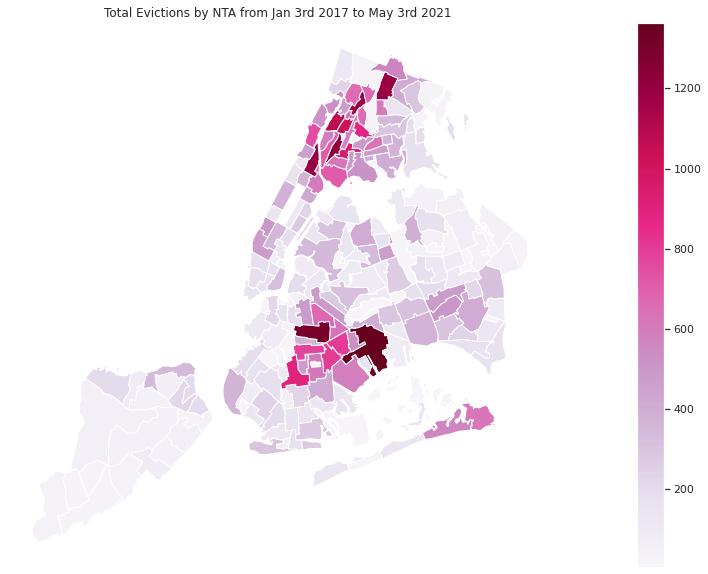

In [38]:
nta_all.plot(column='Court Index Number', legend=True, figsize=(30, 10),cmap='PuRd')
plt.axis('off')
plt.title('Total Evictions by NTA from Jan 3rd 2017 to May 3rd 2021 ')
plt.show()

Highest in the Bronx, northern Manhattan and mid Brooklyn/Queens

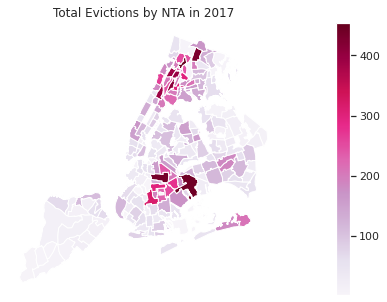

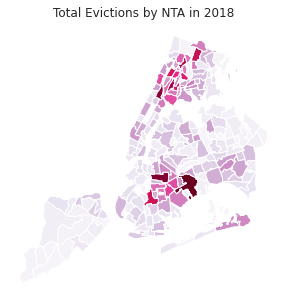

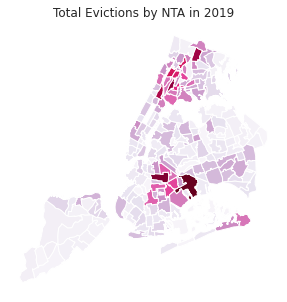

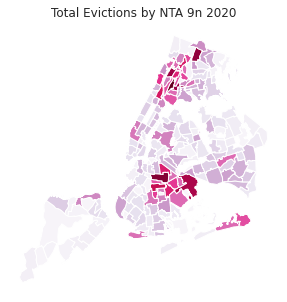

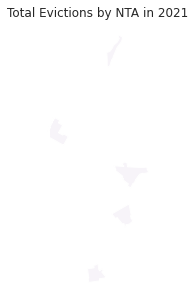

In [39]:
ax1 = nta2017.plot(column='Court Index Number', legend=True, figsize=(20, 5),cmap='PuRd')
plt.axis('off')
plt.title('Total Evictions by NTA in 2017')
plt.show()

ax2 = nta2018.plot(column='Court Index Number', figsize=(20, 5),cmap='PuRd')
plt.axis('off')
plt.title('Total Evictions by NTA in 2018')
plt.show()

ax1 = nta2019.plot(column='Court Index Number', figsize=(20, 5),cmap='PuRd')
plt.axis('off')
plt.title('Total Evictions by NTA in 2019')
plt.show()

ax1 = nta2020.plot(column='Court Index Number', figsize=(20, 5),cmap='PuRd')
plt.axis('off')
plt.title('Total Evictions by NTA 9n 2020')
plt.show()

ax1 = nta2021.plot(column='Court Index Number', figsize=(20, 5),cmap='PuRd')
plt.axis('off')
plt.title('Total Evictions by NTA in 2021')
plt.show()

Notes: 
* Areas of highest evictions numbers stayed constant (Highest in the Bronx, northern Manhattan and mid Brooklyn/Queens in each year)
* Evictions are hardly visible in 2020 because there are not many



## Evictions and Median Household Income

In [40]:
# zip code map
zipcodes = gpd.read_file('/content/MyDrive/MyDrive/Colab Notebooks/Data/ZIP_CODE_040114 (1)')

In [41]:
# median income data
incomes = pd.read_csv('/content/MyDrive/MyDrive/Colab Notebooks/Data/MedianIncomes_AllHouseholds.csv')

In [42]:
# number of evictions per post code
evictions.groupby(['Eviction Postcode']).count()['Court Index Number']

Eviction Postcode
0          3
1000       1
10000      1
10001    347
10002    321
        ... 
11693    105
11694    138
11698      1
11753      1
12221      1
Name: Court Index Number, Length: 223, dtype: int64

In [43]:
# median incomes per zip code for years 2019, 2018 and 2017
incomes.head()

,Zip Code,2019,2018,2017
0,10001,92840,90130,88880
1,10002,36982,36509,36971
2,10003,118161,114163,108925
3,10004,190223,160501,146480
4,10005,189702,176473,160834


In [44]:
# new columns with 'ZIPCODE' name
evictions2017['ZIPCODE'] = evictions2017['Eviction Postcode']
evictions2018['ZIPCODE'] = evictions2018['Eviction Postcode']
evictions2019['ZIPCODE'] = evictions2019['Eviction Postcode']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [45]:
# checking datatype of zip code
evictions2017.dtypes['ZIPCODE']

dtype('int64')

In [46]:
# checking datatype of zip code
zipcodes.dtypes['ZIPCODE']

dtype('O')

In [47]:
# changing data type to int64
zipcodes['ZIPCODE'] = zipcodes['ZIPCODE'].astype(str).astype(int)

In [48]:
# new column with 'ZIPCODE' name
incomes["ZIPCODE"] = incomes["Zip Code"]

In [49]:
# merging evictions by zipcode to zipcode shape file on 'ZIPCODE' column for years 2017-2019
zipcodes_evictions2017 = zipcodes.merge(evictions2017.groupby(['ZIPCODE']).count()['Court Index Number'], on='ZIPCODE')
zipcodes_evictions2018 = zipcodes.merge(evictions2018.groupby(['ZIPCODE']).count()['Court Index Number'], on='ZIPCODE')
zipcodes_evictions2019 = zipcodes.merge(evictions2019.groupby(['ZIPCODE']).count()['Court Index Number'], on='ZIPCODE')

# merging income by zipcode to zipcode shape file on 'ZIPCODE'
zipcodes_income = zipcodes.merge(incomes, on='ZIPCODE')

In [50]:
zipcodes_income.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Zip Code,2019,2018,2017
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,75222,76605,72233
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,44831,42466,42347
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,26521,26714,26779
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,59820,56874,54156
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,73470,70673,66906


In [51]:
zipcodes_evictions2017.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Court Index Number
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",46
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",311
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",500
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",239
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",89


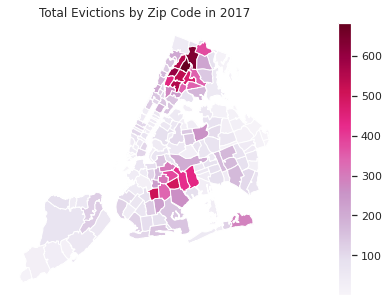

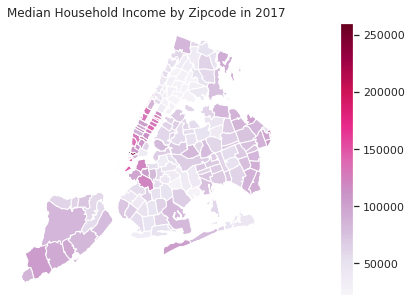

In [52]:
ax1 = zipcodes_evictions2017.plot(column='Court Index Number', legend=True, figsize=(20, 5),cmap='PuRd')
plt.axis('off')
plt.title('Total Evictions by Zip Code in 2017')
plt.show()

ax2 = zipcodes_income.plot(column='2017', legend=True, figsize=(20, 5),cmap='PuRd')
plt.axis('off')
plt.title('Median Household Income by Zipcode in 2017')
plt.show()

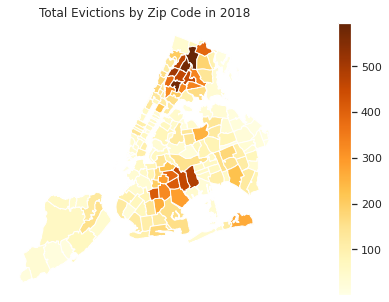

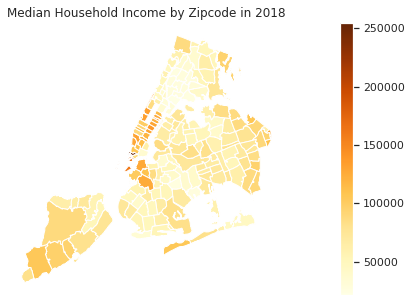

In [53]:
ax1 = zipcodes_evictions2018.plot(column='Court Index Number', legend=True, figsize=(20, 5),cmap='YlOrBr')
plt.axis('off')
plt.title('Total Evictions by Zip Code in 2018')
plt.show()

ax2 = zipcodes_income.plot(column='2018', legend=True, figsize=(20, 5),cmap='YlOrBr')
plt.axis('off')
plt.title('Median Household Income by Zipcode in 2018')
plt.show()

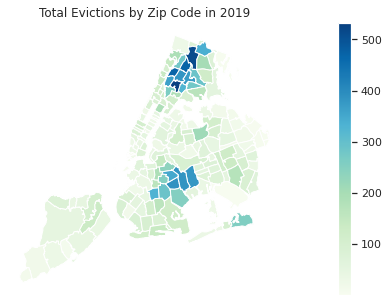

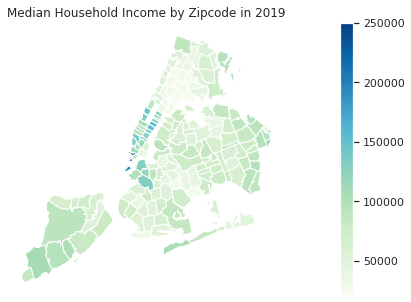

In [54]:
ax1 = zipcodes_evictions2019.plot(column='Court Index Number', legend=True, figsize=(20, 5),cmap='GnBu')
plt.axis('off')
plt.title('Total Evictions by Zip Code in 2019')
plt.show()

ax2 = zipcodes_income.plot(column='2019', legend=True, figsize=(20, 5),cmap='GnBu')
plt.axis('off')
plt.title('Median Household Income by Zipcode in 2019')
plt.show()

For all three years the general trend is: zip codes with low median household income contain more evictions
* the bronx has the lowest median household income and has the highest number of evictions
* downtown Manhattan with the highest median income has a low number of evictions
* mid brooklyn/queens have a high number of evictions and low median incomes